# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import seaborn as sns
import matplotlib.pyplot as plt

# 2. Import Dataset

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [3]:
pd.options.display.max_columns = 100

In [4]:
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


# 3. Exploratory Data Analysis (EDA)

### Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edible                    8124 non-null   bool  
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                5644 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [6]:
df.shape

(8124, 23)

### Data Description

In [7]:
df.describe()

,ring_number
count,8124.000000
mean,1.069424
std,0.271064
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [8]:
df.describe(include='O')

,cap_shape,cap_surface,cap_color,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,5644,8124,8124,7932,7932,8124,8124,8124,8124,8124,8124
unique,6,4,10,9,2,2,2,12,2,4,4,4,8,8,1,4,5,9,6,7
top,convex,scaly,brown,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,pendant,white,several,woods
freq,3656,3244,2284,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,3968,2388,4040,3148


### Check Missing Value

,missing_value,%
edible,0,0.00
cap_shape,0,0.00
cap_surface,0,0.00
cap_color,0,0.00
bruises,0,0.00
odor,0,0.00
gill_attachment,0,0.00
gill_spacing,0,0.00
gill_size,0,0.00
gill_color,0,0.00


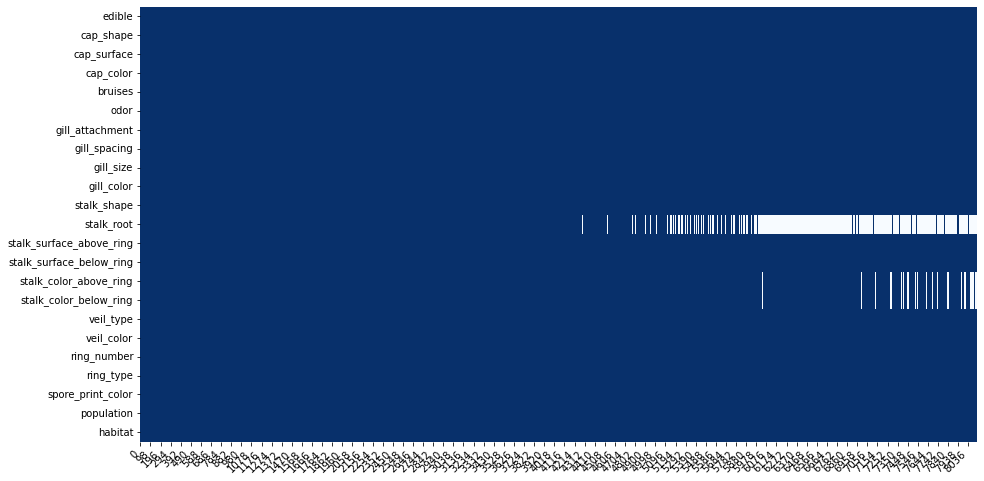

In [9]:
plot_missing_value(df, return_df= True)

## Features Distribution

In [10]:
features = df.drop(columns = 'edible')

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

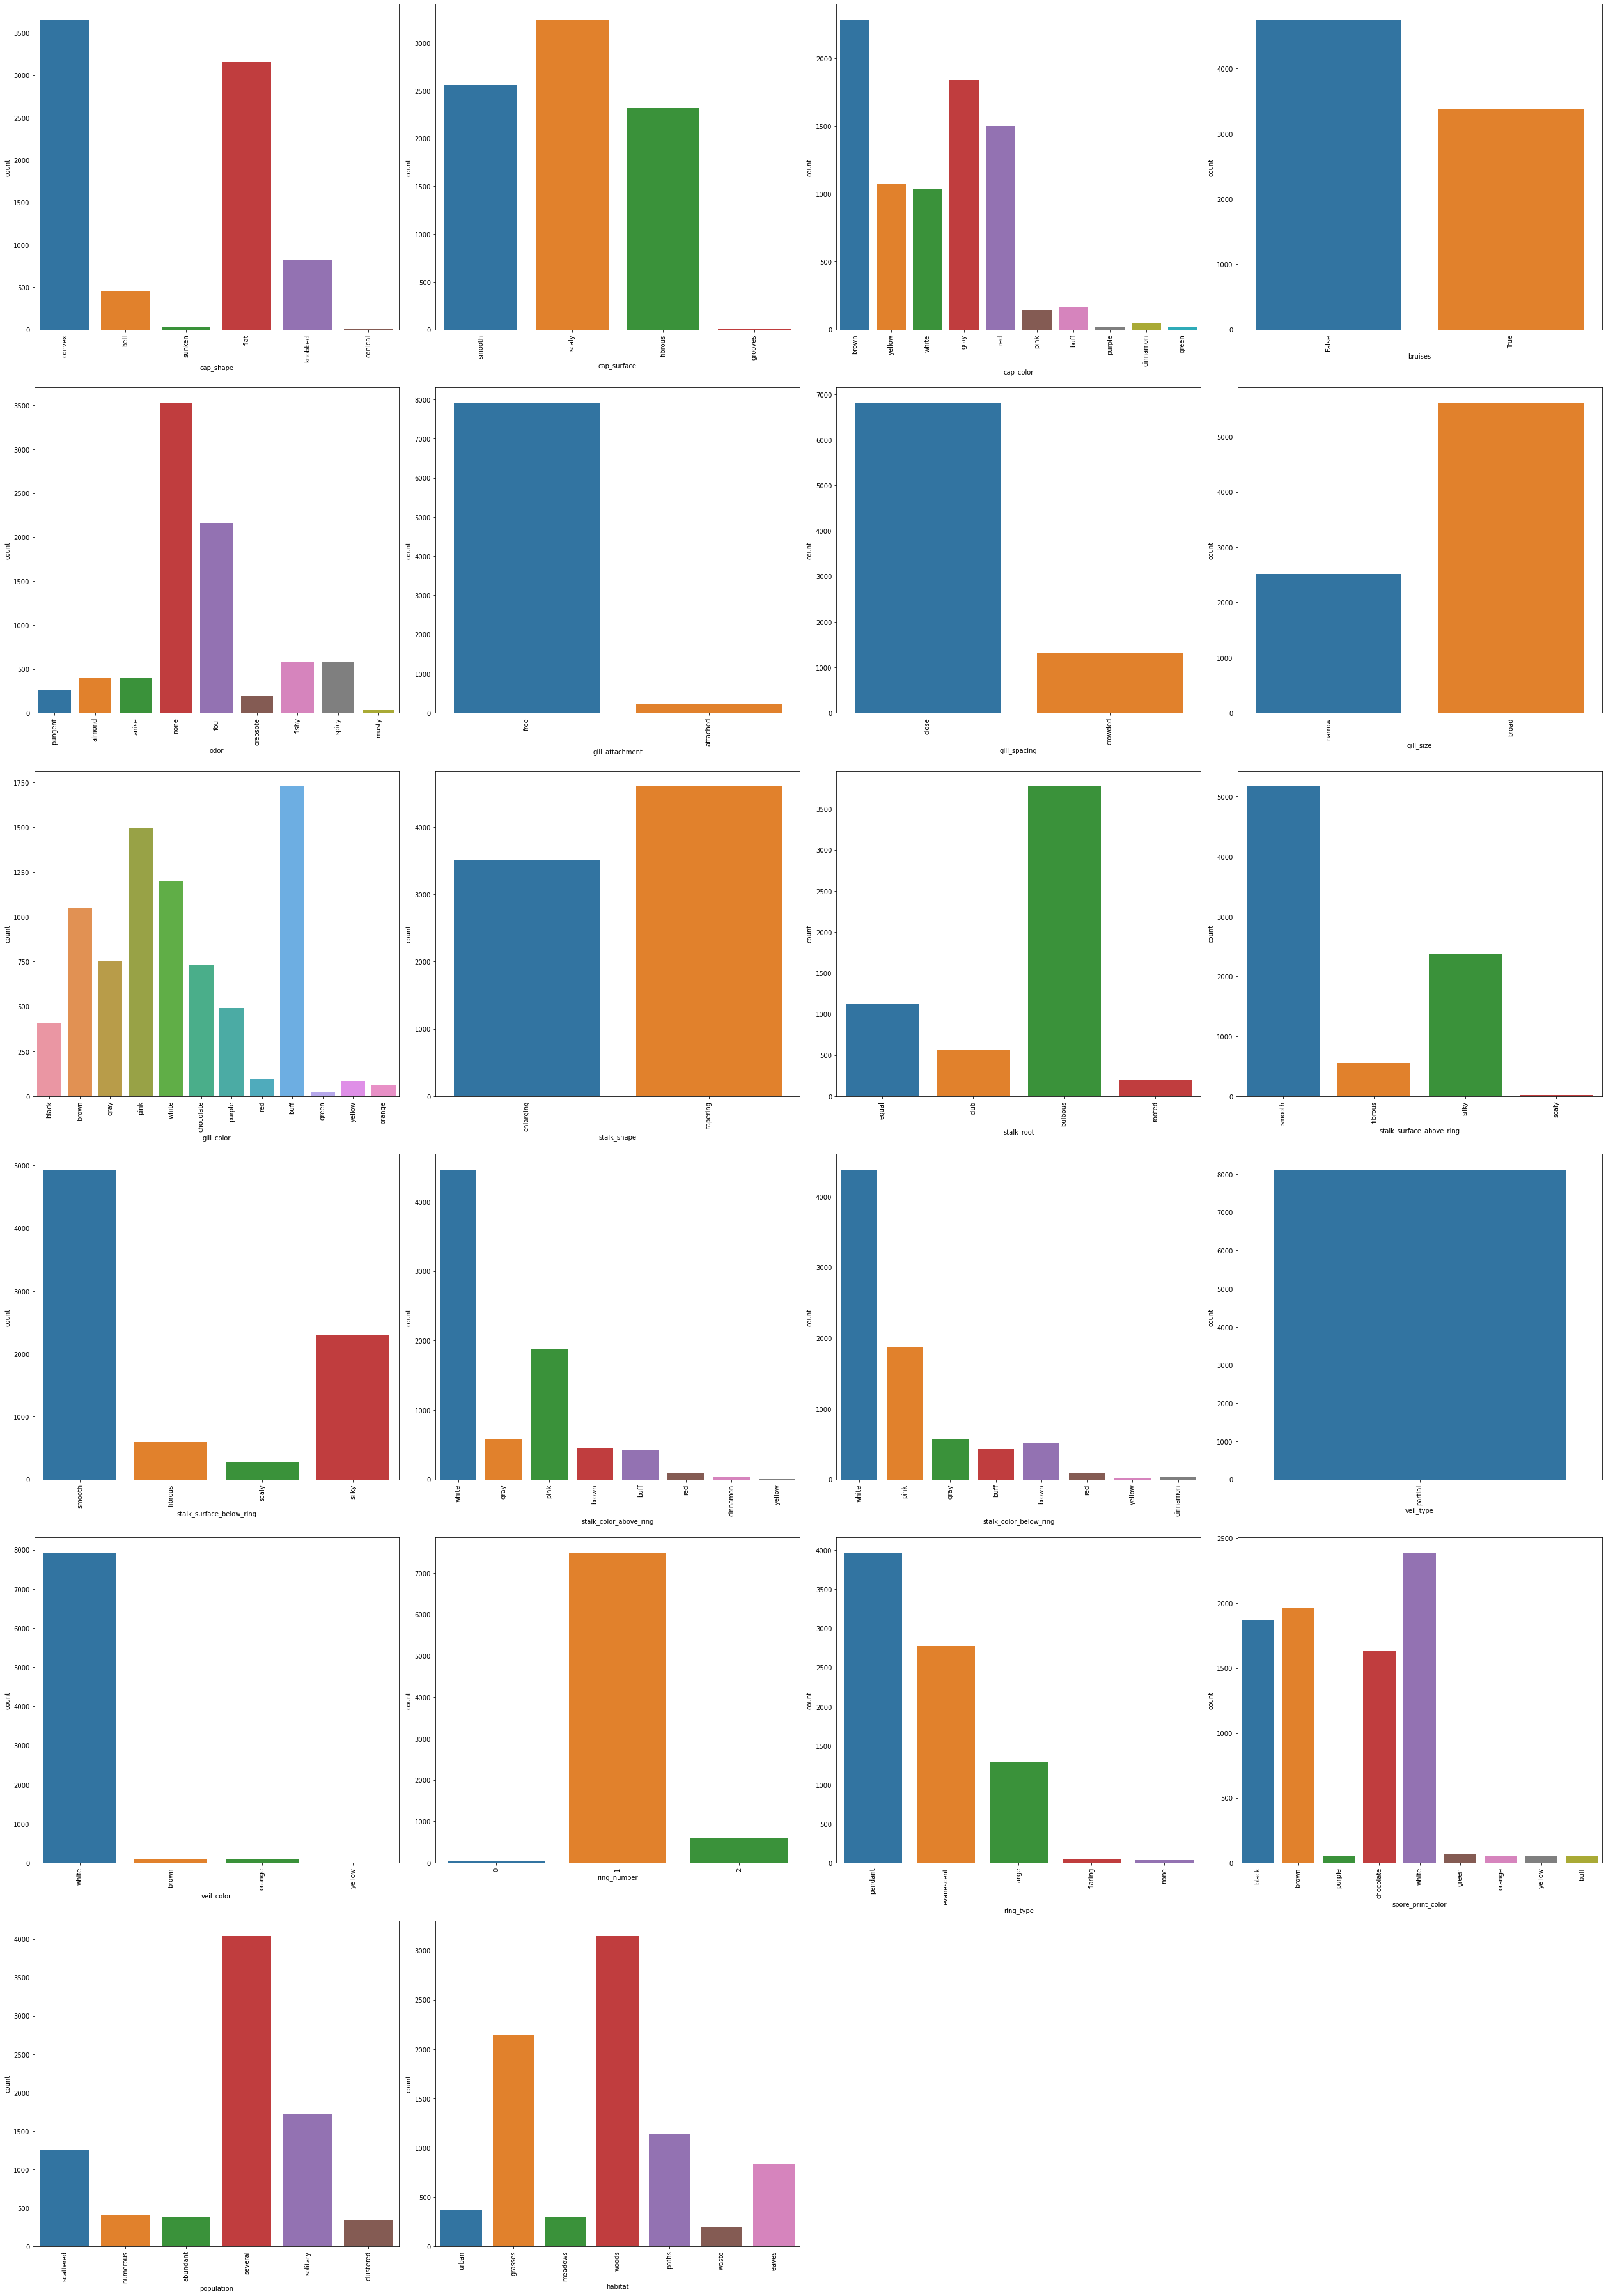

In [11]:
canvas = plt.figure(figsize=(35, 50))

for i, j in enumerate(features):
    canvas.add_subplot(6, 4, i+1)
    plot = sns.countplot(df[j])
    plt.setp(plot.get_xticklabels(), rotation=90)
    canvas.tight_layout()

### Features distribution based on the edible mushroom or not

In [12]:
col = df.iloc[:,1:]
col = col.drop(columns='bruises')

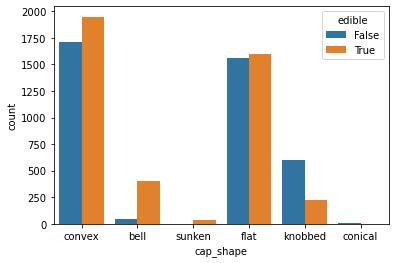

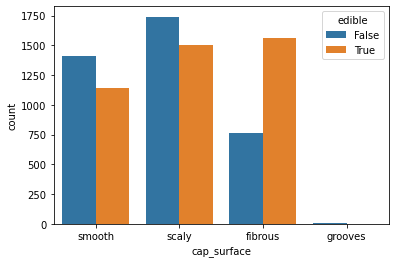

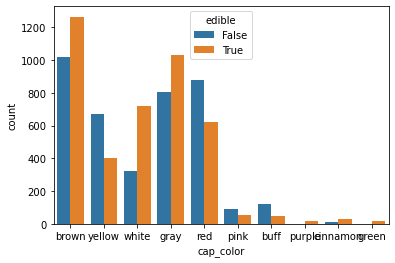

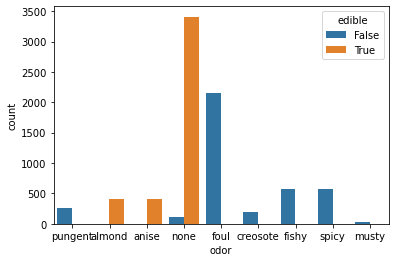

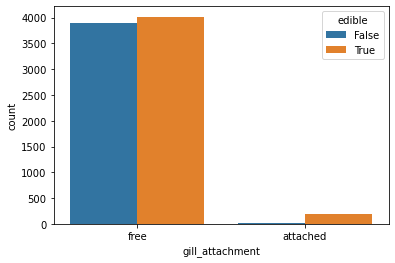

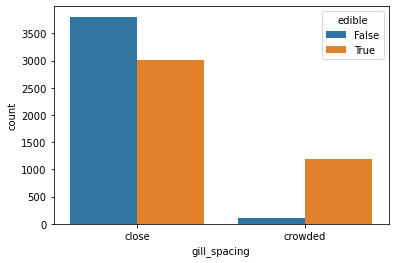

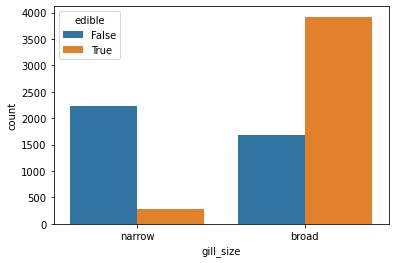

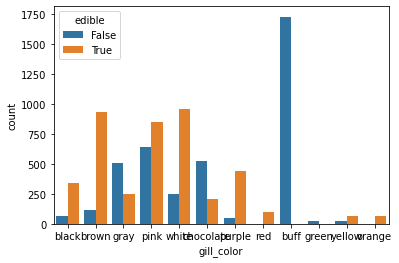

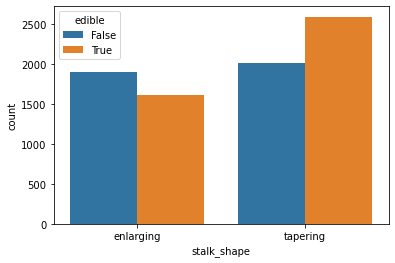

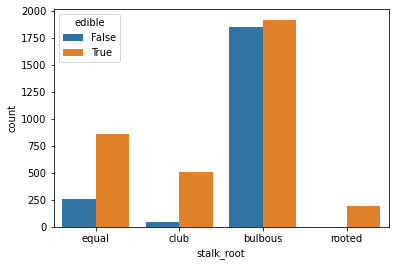

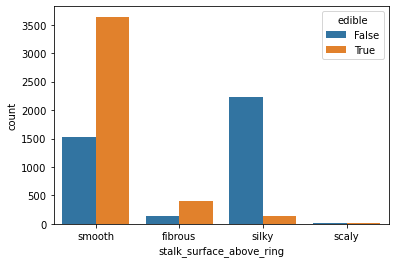

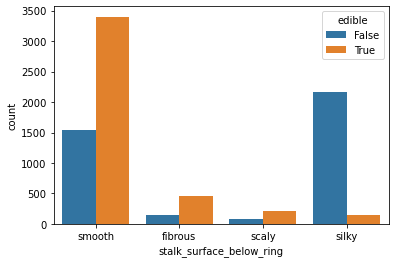

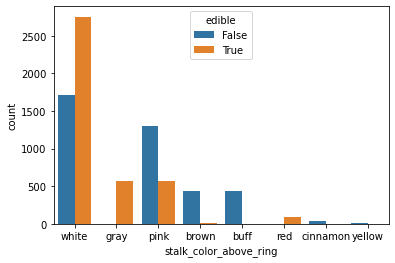

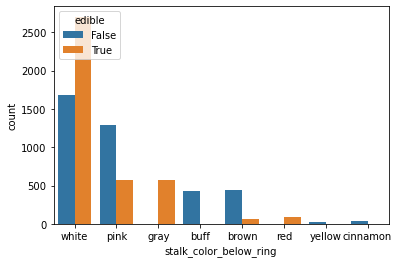

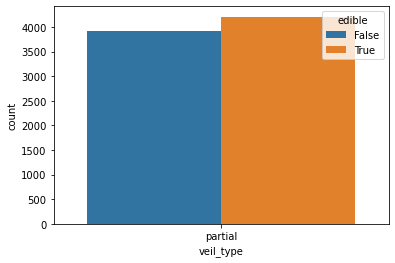

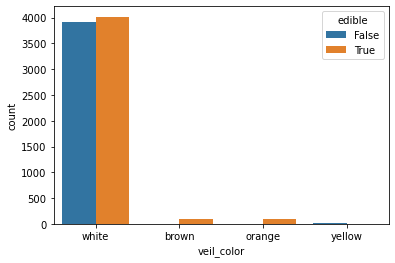

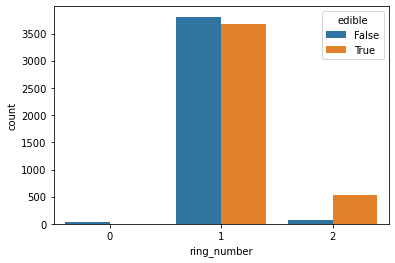

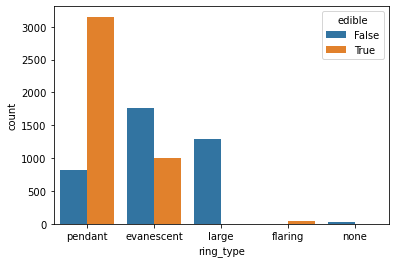

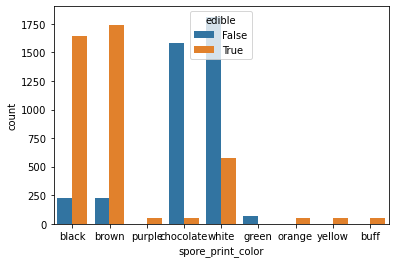

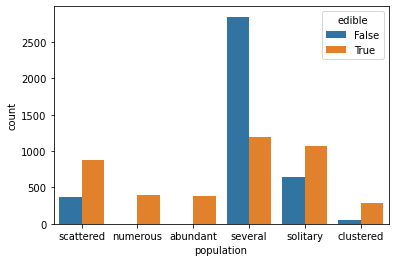

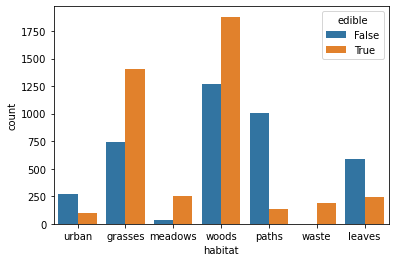

In [13]:
for categoric in col:
    sns.countplot(x= df[categoric], data=df, hue='edible')
    plt.show()

## Check Imbalanced Dataset

In [14]:
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='edible', ylabel='count'>

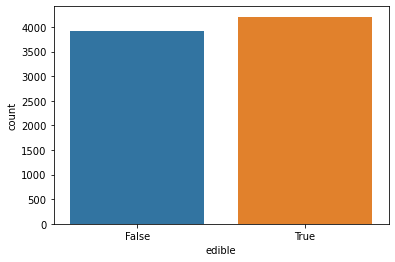

In [15]:
sns.countplot(df.edible)

In [16]:
df.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

`The dataset is fairly balanced. Therefore, I can use 'accuracy' for the scoring of model`

## Assosiation Matrix

In [17]:
from jcopml.plot import plot_association_matrix

In [18]:
df.veil_type.value_counts()

partial    8124
Name: veil_type, dtype: int64

`Because the column of veil_type only has one value of category, I can eliminate it from the dataset.`

In [19]:
df.drop(columns='veil_type', inplace= True)

In [20]:
plot_association_matrix(df, target_col = 'edible', categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

`Because Github can't display the correlation plot, I've captured a picture of this plot.`

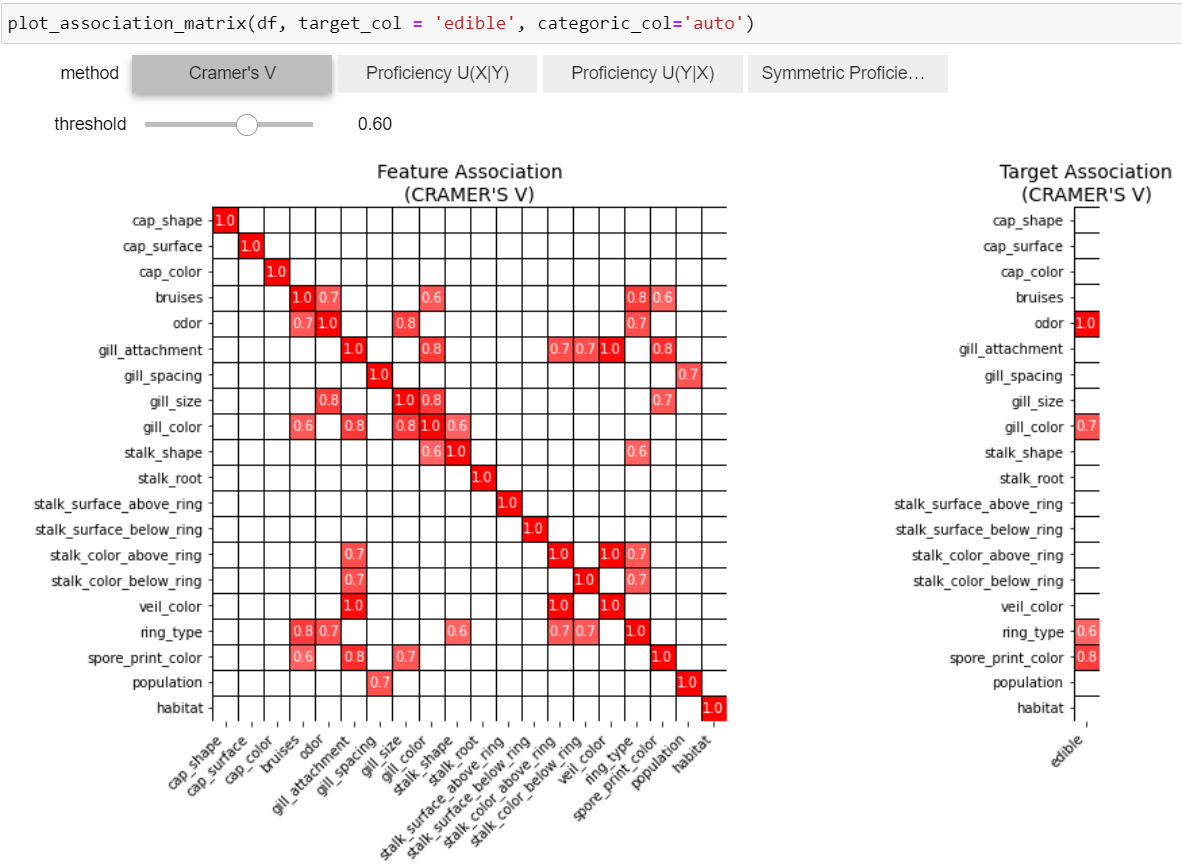

`In this case, I use Cramer's V to get an association matrix against the target variable by setting a threshold is 0.6`

`Based on the association matrix, the column of odor, gill_color, ring_type, and spore_print_color that has higher effects against a mushroom is edible or not.`

## Insight From Data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

<AxesSubplot:xlabel='ring_type', ylabel='count'>

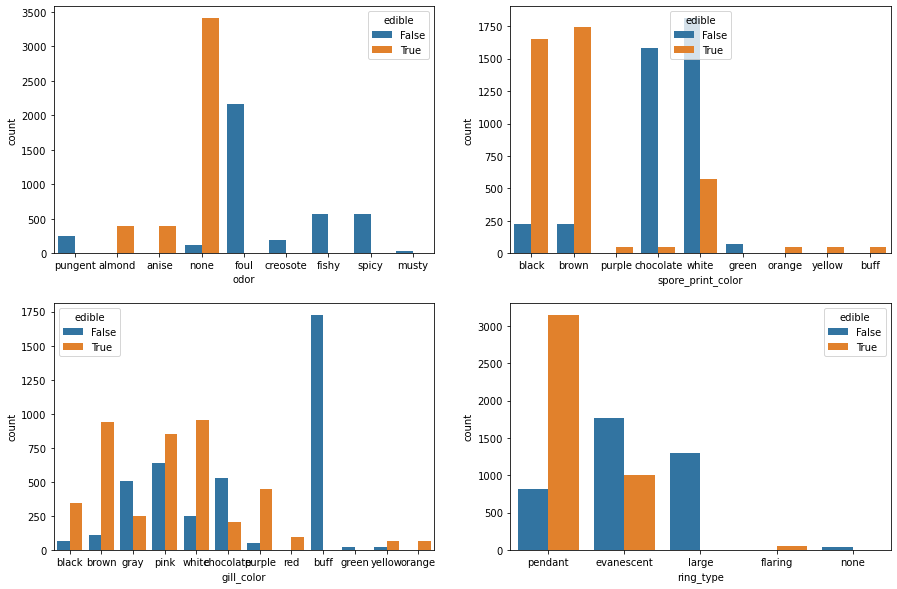

In [22]:
plt.figure(figsize=(15,10))

plt.subplot(221)
sns.countplot('odor', data=df, hue='edible')

plt.subplot(222)
sns.countplot('spore_print_color', data=df, hue='edible')

plt.subplot(223)
sns.countplot('gill_color', data=df, hue='edible')

plt.subplot(224)
sns.countplot('ring_type', data=df, hue='edible')

1. Most mushrooms are edible if there are no smells. Contrarily, if the smell of mushrooms is foul, it's not edible
2. Most mushrooms are edible if the color of the spore is black or brown. The mushrooms are not edible when the color of the spore is chocolate or white.
3. Mushrooms are not edible if the color of the gill is buff
4. Pendant rings are regarded as the most edible mushrooms

# 4. Dataset Splitting

In [21]:
X = df[['odor','gill_color','ring_type','spore_print_color']]
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

# 5. Modeling

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [23]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), X_train.columns)
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])


model = GridSearchCV(pipeline, gsp.svm_params, cv= 3, scoring='accuracy', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1.0, 'algo__gamma': 1.0}
0.9938452069549162 0.9938453960417766 0.9975384615384615


# 6. Feature Importance

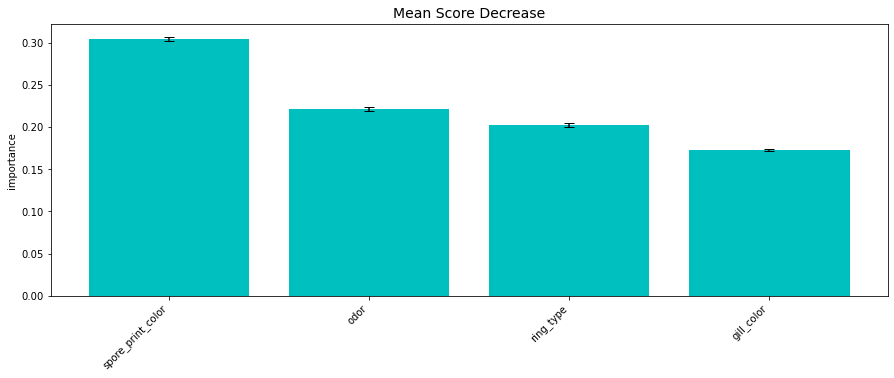

In [24]:
df_imp = mean_score_decrease(X_train, y_train, model, plot = True, topk=10)

In [25]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), df_imp)
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])


model = GridSearchCV(pipeline, gsp.svm_params, cv= 3, scoring='accuracy', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'algo__C': 1.0, 'algo__gamma': 1.0}
0.9938452069549162 0.9938453960417766 0.9975384615384615


# 7. Tuning Hyperparameters

In [27]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), ['odor','spore_print_color'])
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500, probability=True))
])

parameter = {'algo__gamma': np.logspace(-4,4,5),
             'algo__C': np.logspace(-4,4,5)}

model = GridSearchCV(pipeline, parameter, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\Malik Afu Hamid\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'algo__C': 0.0001, 'algo__gamma': 100.0}
0.9932297276504077 0.9932294664534849 0.9975384615384615


# 8. Evaluation

In [28]:
from jcopml.plot import plot_classification_report, plot_confusion_matrix, plot_roc_curve, plot_pr_curve

## 8.1. Classification Report

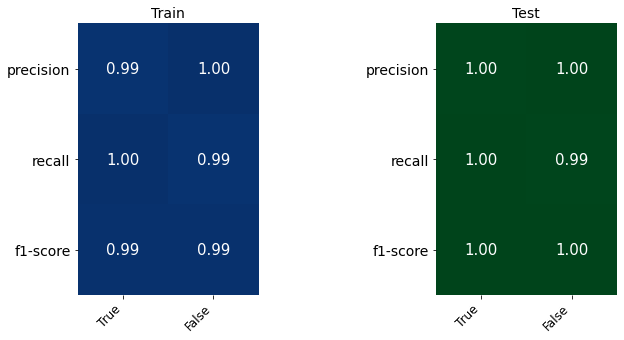

In [29]:
plot_classification_report(X_train, y_train, X_test, y_test, model)

In [30]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## 8.2. Confusion Matrix

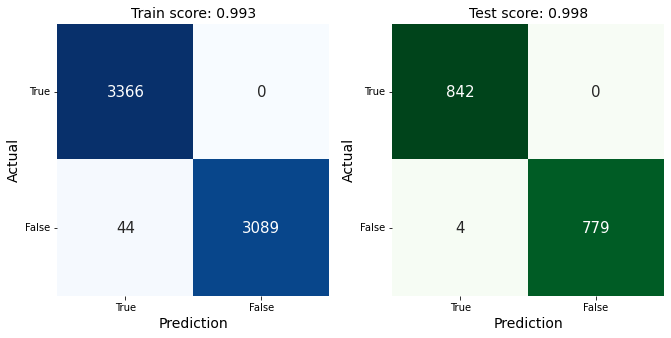

In [31]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

## 8.3. ROC AUC Curve

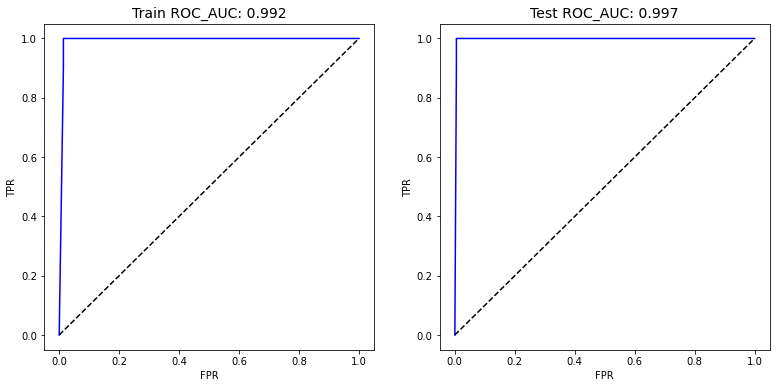

In [32]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

## 8.4. PR Curve

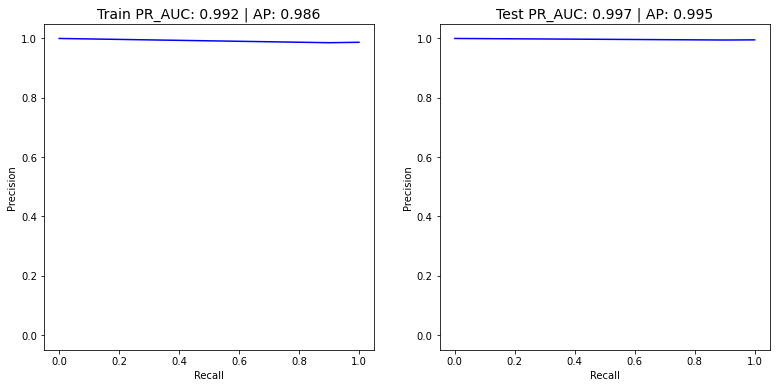

In [33]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Save Model

In [34]:
save_model(model.best_estimator_, 'Mushroom_Classification_Support_Vector_Classifier.pkl')

Model is pickled as model/Mushroom_Classification_Support_Vector_Classifier.pkl
